In [1]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np
from datetime import datetime

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# yahoo finance is used to fetch data
import yfinance as yf

In [2]:
df=pd.read_csv('Adanit.csv',index_col=['Dates'])
df['Curr_DT']=df.index
df['Curr_DT'] = pd.to_datetime(df["Curr_DT"])
df['Close_after_30']=df['Close'].shift(6)
df['Next_DT']=df['Curr_DT'].shift(6)
df['Change_in_Vol']=df['Volume'].diff(periods=1)
df['Change_in_Price']=df['Close'].diff(periods=1)
df=df.dropna()
df

,Open,Close,Volume,Curr_DT,Close_after_30,Next_DT,Change_in_Vol,Change_in_Price
Dates,,,,,,,,
15-12-2022 12:40,2646.50,2646.05,255.0,2022-12-15 12:40:00,2654.85,2022-12-15 13:10:00,-138.0,-3.35
15-12-2022 12:35,2648.95,2645.60,1301.0,2022-12-15 12:35:00,2653.00,2022-12-15 13:05:00,1046.0,-0.45
15-12-2022 12:30,2649.80,2648.85,400.0,2022-12-15 12:30:00,2650.00,2022-12-15 13:00:00,-901.0,3.25
15-12-2022 12:25,2649.95,2649.85,1166.0,2022-12-15 12:25:00,2646.70,2022-12-15 12:55:00,766.0,1.00
15-12-2022 12:20,2649.50,2649.00,1631.0,2022-12-15 12:20:00,2648.90,2022-12-15 12:50:00,465.0,-0.85
...,...,...,...,...,...,...,...,...
15-11-2022 09:30,3268.60,3277.00,8904.0,2022-11-15 09:30:00,3291.35,2022-11-15 10:00:00,-1455.0,-15.80
15-11-2022 09:25,3274.10,3268.55,9327.0,2022-11-15 09:25:00,3290.75,2022-11-15 09:55:00,423.0,-8.45
15-11-2022 09:20,3281.10,3274.10,4931.0,2022-11-15 09:20:00,3294.80,2022-11-15 09:50:00,-4396.0,5.55


In [7]:
df['diff'] = df['Next_DT']-df['Curr_DT']
#print(type(df['diff']))
df['minutes'] = df['diff'].dt.total_seconds()/60
mask=df['minutes']==30
df=df.loc[mask]
df


,Open,Close,Volume,Curr_DT,Close_after_30,Next_DT,Change_in_Vol,Change_in_Price,diff,minutes
Dates,,,,,,,,,,
15-12-2022 12:40,2646.50,2646.05,255.0,2022-12-15 12:40:00,2654.85,2022-12-15 13:10:00,-138.0,-3.35,0 days 00:30:00,30.0
15-12-2022 12:35,2648.95,2645.60,1301.0,2022-12-15 12:35:00,2653.00,2022-12-15 13:05:00,1046.0,-0.45,0 days 00:30:00,30.0
15-12-2022 12:30,2649.80,2648.85,400.0,2022-12-15 12:30:00,2650.00,2022-12-15 13:00:00,-901.0,3.25,0 days 00:30:00,30.0
15-12-2022 12:25,2649.95,2649.85,1166.0,2022-12-15 12:25:00,2646.70,2022-12-15 12:55:00,766.0,1.00,0 days 00:30:00,30.0
15-12-2022 12:20,2649.50,2649.00,1631.0,2022-12-15 12:20:00,2648.90,2022-12-15 12:50:00,465.0,-0.85,0 days 00:30:00,30.0
...,...,...,...,...,...,...,...,...,...,...
15-11-2022 09:35,3277.45,3292.80,10359.0,2022-11-15 09:35:00,3292.35,2022-11-15 10:05:00,-4324.0,0.35,0 days 00:30:00,30.0
15-11-2022 09:30,3268.60,3277.00,8904.0,2022-11-15 09:30:00,3291.35,2022-11-15 10:00:00,-1455.0,-15.80,0 days 00:30:00,30.0
15-11-2022 09:25,3274.10,3268.55,9327.0,2022-11-15 09:25:00,3290.75,2022-11-15 09:55:00,423.0,-8.45,0 days 00:30:00,30.0


In [4]:
#Separate out X and y
columnname = ['Close', 'Volume']
X1 = df[columnname]

y1 = df['Close_after_30']

In [5]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=0)
#Taking the values randomly helps 


In [6]:
# # Split the data into train and test dataset
# t = .75
# t = int(t*len(df))

# # Train dataset
# X1_train = X[:t]
# y1_train = y[:t]

# # Test dataset
# X1_test = X[t:]
# y1_test = y[t:]

In [7]:
# Create a linear regression model
linear = LinearRegression().fit(X1_train, y1_train)
print("Linear Regression model")
print("Close_after_30(y) = %.2f * Price(x1) \
+ %.2f * Volume(x2) \
+ %.2f (constant)" % (linear.coef_[0],linear.coef_[1],linear.intercept_))

Linear Regression model
Close_after_30(y) = 1.00 * Price(x1) + -0.00 * Volume(x2) + 9.66 (constant)


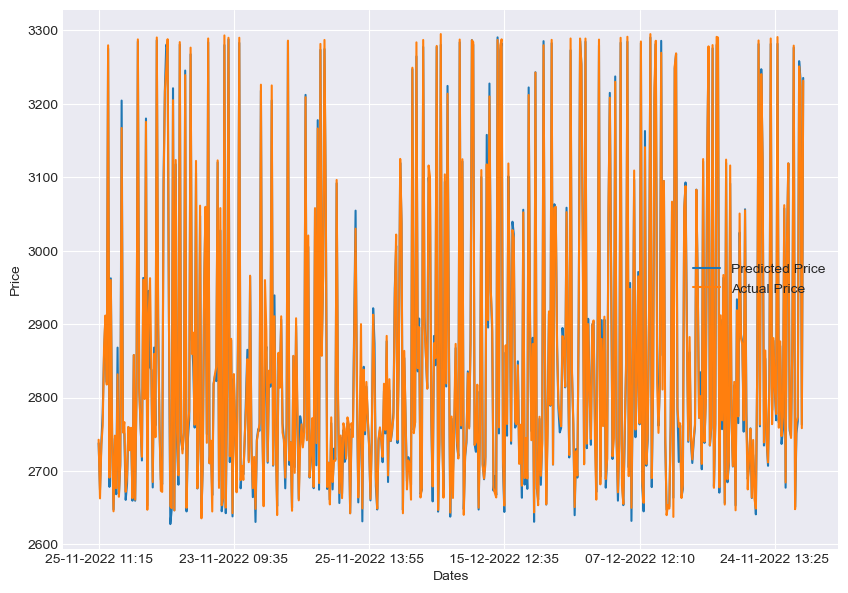

In [8]:
predicted_price_1 = linear.predict(X1_test)
predicted_price_1 = pd.DataFrame(
    predicted_price_1, index=y1_test.index, columns=['price'])
predicted_price_1.plot(figsize=(10, 7))
y1_test.plot()
plt.legend(['Predicted Price', 'Actual Price'])
plt.ylabel("Price")
plt.show()

In [9]:
# R square
r2_score = linear.score(X1_test, y1_test)*100
float("{0:.2f}".format(r2_score))

99.48

In [10]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(y1_test,predicted_price_1))
print("RMSE: ", rms)

RMSE:  14.122864862702105


In [11]:
print(y1_test[0:5],predicted_price_1[0:5])

Dates
25-11-2022 11:15    2742.55
09-12-2022 10:15    2662.70
25-11-2022 12:45    2735.65
07-12-2022 09:20    2762.00
23-11-2022 14:15    2867.55
Name: Close_after_30, dtype: float64                         price
Dates                        
25-11-2022 11:15  2737.850434
09-12-2022 10:15  2674.431814
25-11-2022 12:45  2737.986696
07-12-2022 09:20  2778.685173
23-11-2022 14:15  2858.744496


In [12]:
#Now an attempt to try change in volume and change in price
#Separate out X and y
columnname = ['Close', 'Volume','Change_in_Vol','Change_in_Price']
X2 = df[columnname]

y2 = df['Close_after_30']

In [13]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=0)

In [14]:
# Create a linear regression model
linear = LinearRegression()
linear.fit(X2_train, y2_train)
print("Linear Regression model")
print("Close_after_30(y) = %.2f * Price(x1) \
+ %.2f * Volume(x2) \
+ %.2f * Change_in_Vol(x3) \
+ %.2f * Change_in_Price(x4) \
+ %.2f (constant)" % (linear.coef_[0],linear.coef_[1],linear.coef_[2],linear.coef_[3],linear.intercept_))

Linear Regression model
Close_after_30(y) = 1.00 * Price(x1) + -0.00 * Volume(x2) + -0.00 * Change_in_Vol(x3) + -0.90 * Change_in_Price(x4) + 8.63 (constant)


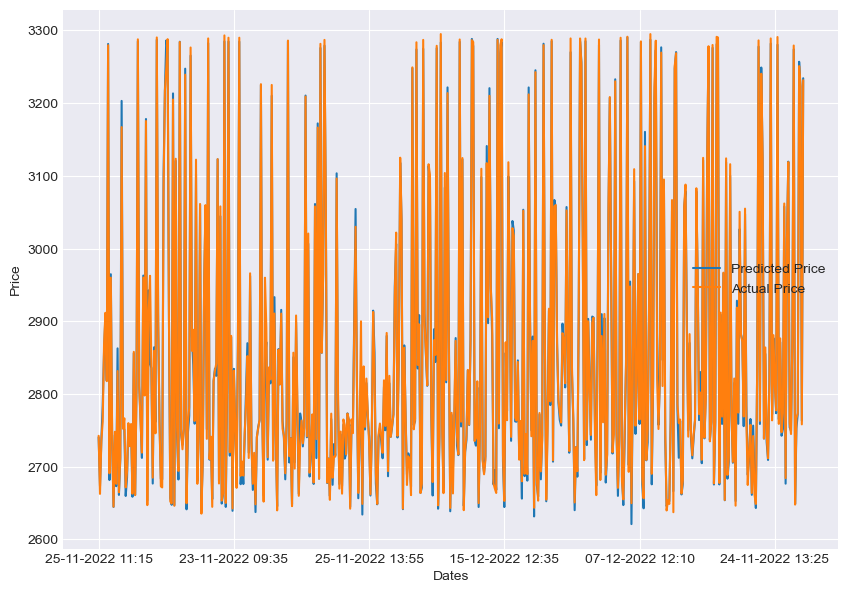

In [15]:
predicted_price_2 = linear.predict(X2_test)
predicted_price_2 = pd.DataFrame(
    predicted_price_2, index=y2_test.index, columns=['price'])
predicted_price_2.plot(figsize=(10, 7))
y2_test.plot()
plt.legend(['Predicted Price', 'Actual Price'])
plt.ylabel("Price")
plt.show()

In [16]:
# R square
r2_score = linear.score(X2_test, y2_test)*100
float("{0:.2f}".format(r2_score))

99.53

In [17]:
rms = sqrt(mean_squared_error(y2_test,predicted_price_2))
print("RMSE: ", rms)

RMSE:  13.42432597256541


In [18]:
print(y2_test[0:5],predicted_price_2[0:5])

Dates
25-11-2022 11:15    2742.55
09-12-2022 10:15    2662.70
25-11-2022 12:45    2735.65
07-12-2022 09:20    2762.00
23-11-2022 14:15    2867.55
Name: Close_after_30, dtype: float64                         price
Dates                        
25-11-2022 11:15  2740.468355
09-12-2022 10:15  2673.382399
25-11-2022 12:45  2736.799278
07-12-2022 09:20  2783.771289
23-11-2022 14:15  2858.217647


In [19]:
import statsmodels.api as sm
X3=np.array(X2)
y3=np.array(y2)

In [20]:
X3 = sm.add_constant(X3)

In [21]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=0)

In [22]:
model = sm.OLS(y3_train, X3_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 6.833e+04
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:58:14   Log-Likelihood:                -4153.8
No. Observations:                1059   AIC:                             8318.
Df Residuals:                    1054   BIC:                             8342.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6304      5.531      1.560      0.1

In [23]:
predicted_price_3=results.predict(X3_test)

In [24]:
rms = sqrt(mean_squared_error(y3_test,predicted_price_3))
print("RMSE: ", rms)

RMSE:  13.42432597256533


In [36]:
predicted=results.predict(X3)

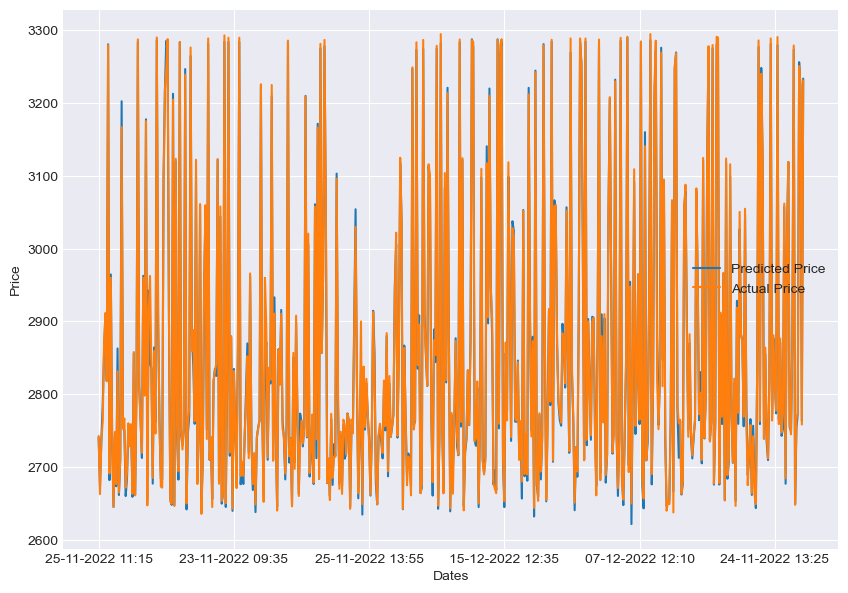

In [25]:
#Ridge regression is used when there are multiple variables that are highly correlated. 
#It helps to prevent overfitting by penalizing the coefficients of the variables.Ridge regression reduces 
#the overfitting by adding a penalty term to the error function that shrinks the size of the coefficients
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
X4 = X2
y4 = y2
#
# Create a training and test split
#
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.33, random_state=0)
#
# Fit a pipeline using Training dataset and related labels
# Use Ridge algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.21))
pipeline.fit(X4_train, y4_train)
predicted_price_4 = pipeline.predict(X4_test)
predicted_price_4 = pd.DataFrame(
    predicted_price_4, index=y4_test.index, columns=['price'])
predicted_price_4.plot(figsize=(10, 7))
y4_test.plot()
plt.legend(['Predicted Price', 'Actual Price'])
plt.ylabel("Price")
plt.show()

In [26]:
rms = sqrt(mean_squared_error(y4_test,predicted_price_4))
print("RMSE: ", rms)
#This is the best RMSE observed yet

RMSE:  13.422454347026454


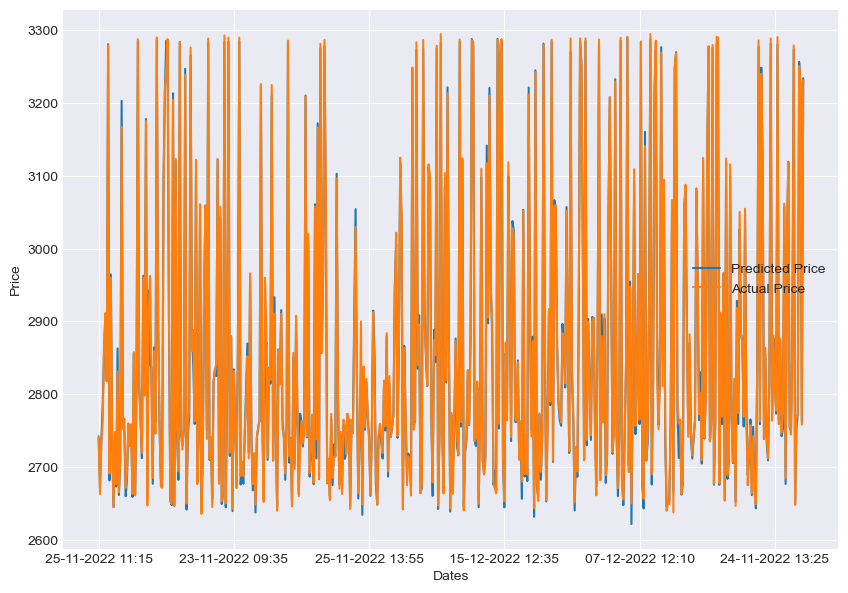

In [27]:
from sklearn.linear_model import Lasso
X5 = X2
y5 = y2
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.33, random_state=0)
#
lasso = Lasso(alpha=1.4)
#
# Fit the Lasso model
#
lasso.fit(X5_train, y5_train)
#
# Create the model score
#
lasso.score(X5_test, y5_test), lasso.score(X5_train, y5_train)
predicted_price_5 = lasso.predict(X5_test)
predicted_price_5 = pd.DataFrame(
    predicted_price_5, index=y5_test.index, columns=['price'])
predicted_price_5.plot(figsize=(10, 7))
y5_test.plot()
plt.legend(['Predicted Price', 'Actual Price'])
plt.ylabel("Price")
plt.show()

In [28]:
rms = sqrt(mean_squared_error(y5_test,predicted_price_5))
print("RMSE: ", rms)
#This is the best RMSE observed yet

RMSE:  13.422749584192315


In [38]:
df

,Open,Close,Volume,Curr_DT,Close_after_30,Next_DT,Change_in_Vol,Change_in_Price,diff,minutes,predicted
Dates,,,,,,,,,,,
15-12-2022 12:40,2646.50,2646.05,255.0,2022-12-15 12:40:00,2654.85,2022-12-15 13:10:00,-138.0,-3.35,0 days 00:30:00,30.0,2647.765360
15-12-2022 12:35,2648.95,2645.60,1301.0,2022-12-15 12:35:00,2653.00,2022-12-15 13:05:00,1046.0,-0.45,0 days 00:30:00,30.0,2644.568142
15-12-2022 12:30,2649.80,2648.85,400.0,2022-12-15 12:30:00,2650.00,2022-12-15 13:00:00,-901.0,3.25,0 days 00:30:00,30.0,2644.683405
15-12-2022 12:25,2649.95,2649.85,1166.0,2022-12-15 12:25:00,2646.70,2022-12-15 12:55:00,766.0,1.00,0 days 00:30:00,30.0,2647.526548
15-12-2022 12:20,2649.50,2649.00,1631.0,2022-12-15 12:20:00,2648.90,2022-12-15 12:50:00,465.0,-0.85,0 days 00:30:00,30.0,2648.366732
...,...,...,...,...,...,...,...,...,...,...,...
15-11-2022 09:35,3277.45,3292.80,10359.0,2022-11-15 09:35:00,3292.35,2022-11-15 10:05:00,-4324.0,0.35,0 days 00:30:00,30.0,3288.973465
15-11-2022 09:30,3268.60,3277.00,8904.0,2022-11-15 09:30:00,3291.35,2022-11-15 10:00:00,-1455.0,-15.80,0 days 00:30:00,30.0,3287.522079
15-11-2022 09:25,3274.10,3268.55,9327.0,2022-11-15 09:25:00,3290.75,2022-11-15 09:55:00,423.0,-8.45,0 days 00:30:00,30.0,3272.290488


In [40]:
df['predicted']=np.round(predicted,2)
columnname = ['Close', 'Close_after_30','predicted']
Df=df[columnname]
Df

C:\Users\Dishay Mehta\AppData\Local\Temp\ipykernel_14264\590078483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted']=np.round(predicted,2)


,Close,Close_after_30,predicted
Dates,,,
15-12-2022 12:40,2646.05,2654.85,2647.77
15-12-2022 12:35,2645.60,2653.00,2644.57
15-12-2022 12:30,2648.85,2650.00,2644.68
15-12-2022 12:25,2649.85,2646.70,2647.53
15-12-2022 12:20,2649.00,2648.90,2648.37
...,...,...,...
15-11-2022 09:35,3292.80,3292.35,3288.97
15-11-2022 09:30,3277.00,3291.35,3287.52
15-11-2022 09:25,3268.55,3290.75,3272.29
